In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
components = pd.read_csv('./competition_data/components.csv')
comp_adaptor = pd.read_csv('./competition_data/comp_adaptor.csv')
comp_boss = pd.read_csv('./competition_data/comp_boss.csv')
comp_elbow = pd.read_csv('./competition_data/comp_elbow.csv')
comp_float = pd.read_csv('./competition_data/comp_float.csv')
comp_hfl = pd.read_csv('./competition_data/comp_hfl.csv')
comp_nut = pd.read_csv('./competition_data/comp_nut.csv')
comp_other = pd.read_csv('./competition_data/comp_other.csv')
comp_sleeve = pd.read_csv('./competition_data/comp_sleeve.csv')
comp_straight = pd.read_csv('./competition_data/comp_straight.csv')
comp_tee = pd.read_csv('./competition_data/comp_tee.csv')
comp_threaded = pd.read_csv('./competition_data/comp_threaded.csv')
comp_id_dict = components.set_index('component_id')['component_type_id'].to_dict()

In [58]:
print components['component_type_id'].unique()
print comp_adaptor['component_type_id'].unique()
print comp_boss['component_type_id'].unique()
print comp_elbow['component_type_id'].unique()
print comp_float['component_type_id'].unique()
print comp_hfl['component_type_id'].unique()
print comp_nut['component_type_id'].unique()
# comp_other does not contain component_type_id column
print comp_sleeve['component_type_id'].unique()
print comp_straight['component_type_id'].unique()
print comp_tee['component_type_id'].unique()
print comp_threaded['component_type_id'].unique()

print comp_adaptor[comp_adaptor['component_id']=='9999']

['OTHER' 'CP-024' 'CP-026' 'CP-028' 'CP-014' 'CP-018' 'CP-001' 'CP-008'
 'CP-009' 'CP-002' 'CP-010' 'CP-021' 'CP-011' 'CP-015' 'CP-027' 'CP-003'
 'CP-004' 'CP-005' 'CP-019' 'CP-025' 'CP-006' 'CP-016' 'CP-020' 'CP-012'
 'CP-022' 'CP-007' 'CP-017' 'CP-023' 'CP-029']
['CP-028' 'CP-029']
['CP-018' 'CP-019' 'CP-020']
['CP-008' 'CP-009' 'CP-010' 'CP-011' 'CP-012']
['CP-021' 'CP-022']
['CP-023']
['CP-025' 'CP-026' 'CP-027']
['CP-024']
['CP-001' 'CP-002' 'CP-003' 'CP-004' 'CP-005' 'CP-006' 'CP-007']
['OTHER']
['CP-014' 'CP-015' 'CP-016' 'CP-017']
Empty DataFrame
Columns: [component_id, component_type_id, adaptor_angle, overall_length, end_form_id_1, connection_type_id_1, length_1, thread_size_1, thread_pitch_1, nominal_size_1, end_form_id_2, connection_type_id_2, length_2, thread_size_2, thread_pitch_2, nominal_size_2, hex_size, unique_feature, orientation, weight]
Index: []


In [23]:
bill_of_materials = pd.read_csv('./competition_data/bill_of_materials.csv')
bill_of_materials.fillna(0,inplace=True)

In [24]:
print bill_of_materials.columns
print bill_of_materials.ix[1,]

Index([u'tube_assembly_id', u'component_id_1', u'quantity_1',
       u'component_id_2', u'quantity_2', u'component_id_3', u'quantity_3',
       u'component_id_4', u'quantity_4', u'component_id_5', u'quantity_5',
       u'component_id_6', u'quantity_6', u'component_id_7', u'quantity_7',
       u'component_id_8', u'quantity_8'],
      dtype='object')
tube_assembly_id    TA-00002
component_id_1        C-1312
quantity_1                 2
component_id_2             0
quantity_2                 0
component_id_3             0
quantity_3                 0
component_id_4             0
quantity_4                 0
component_id_5             0
quantity_5                 0
component_id_6             0
quantity_6                 0
component_id_7             0
quantity_7                 0
component_id_8             0
quantity_8                 0
Name: 1, dtype: object


In [51]:
comp_list = [comp_adaptor,comp_boss,comp_elbow,comp_float,comp_hfl,comp_nut,comp_other,\
            comp_sleeve,comp_straight,comp_tee,comp_threaded]
comp_weight = pd.concat([pd.DataFrame(c,columns=['component_id','weight']) for c in comp_list])
comp_id_weight = comp_weight.set_index('component_id')['weight'].to_dict()
print comp_other[components['component_id']=='9999']

  component_id   name component_type_id
0         9999  OTHER             OTHER


In [60]:
tube_assembly_comp = pd.DataFrame()
tube_assembly_comp['tube_assembly_id'] = bill_of_materials['tube_assembly_id']
tube_assembly_comp['comp_quant'] = bill_of_materials['quantity_1']+bill_of_materials['quantity_2']+\
bill_of_materials['quantity_3']+bill_of_materials['quantity_4']+bill_of_materials['quantity_5']+\
bill_of_materials['quantity_6']+bill_of_materials['quantity_7']+bill_of_materials['quantity_8']
comp_id_weight[0] = 0
# cannot find component_id == '9999' in comp table
# but '9999' can be found in component table
comp_id_weight['9999'] = 0
def f(s):
    weight = []
    for i in range(1,9):
        weight.append(float(comp_id_weight[s['component_id_'+str(i)]]) * s['quantity_'+str(i)])
    return sum(weight)
tube_assembly_comp['weight'] = bill_of_materials.apply(f,axis=1)


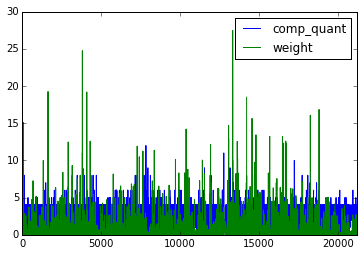

In [61]:
tube_assembly_comp.plot()

In [78]:
train_df = pd.read_csv('./competition_data/train_set.csv', parse_dates=['quote_date'])
train_df_weight_quant = train_df.set_index('tube_assembly_id').join(tube_assembly_comp.set_index('tube_assembly_id'))

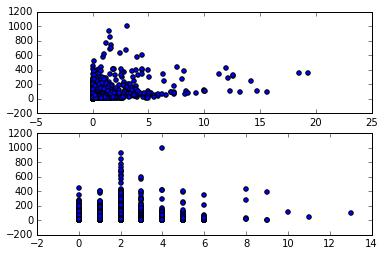

In [84]:
x_weight = train_df_weight_quant[train_df_weight_quant['quantity']==1]['weight']
y = train_df_weight_quant[train_df_weight_quant['quantity']==1]['cost']
plt.subplot(2,1,1)
plt.scatter(x_weight,y)
x_quant = train_df_weight_quant[train_df_weight_quant['quantity']==1]['comp_quant']
plt.subplot(2,1,2)
plt.scatter(x_quant,y)

In [85]:
import statsmodels.formula.api as sm
result = sm.ols(formula="cost ~ weight + quantity", data=train_df_weight_quant).fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     3730.
Date:                Thu, 09 Jul 2015   Prob (F-statistic):               0.00
Time:                        22:09:31   Log-Likelihood:            -1.4042e+05
No. Observations:               30109   AIC:                         2.809e+05
Df Residuals:                   30106   BIC:                         2.809e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.0728      0.175     69.033      0.0